In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

# Credit Card Fraud Detection

In [26]:
credit = pd.read_csv('creditcard.csv')
credit.shape

(284807, 31)

In [27]:
df = credit.copy()

In [28]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
df['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot: ylabel='count'>

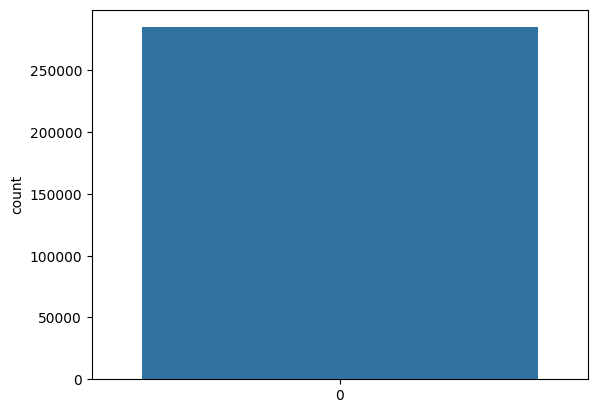

In [31]:
sns.countplot(df['Class'])

### 학습

In [32]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [33]:
X = df.drop(['Time','Class'], axis = 1)
y = df['Class']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,
                                                 stratify = y,
                                                 random_state = 2022
                                                 )
X_train.shape, X_test.shape

((213605, 29), (71202, 29))

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
amount = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
amount[:10]

array([[-0.29373076],
       [ 1.09165967],
       [-0.29527008],
       [-0.04282116],
       [-0.28001679],
       [-0.18191996],
       [ 3.96725441],
       [ 0.55513574],
       [ 0.80366639],
       [ 2.77609852]])

In [41]:
X_train['Amount'] = amount.reshape(-1)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
128422,1.215333,0.801141,-0.189307,1.419017,0.008088,-1.408858,0.381728,-0.318842,-0.253099,-0.709171,...,-0.049420,-0.035684,0.013635,-0.094377,0.603550,0.678874,-0.350695,0.041712,0.062790,-0.293731
171305,1.738408,-0.491419,-0.363447,1.246371,-0.463203,0.081463,-0.435535,0.148466,0.742494,0.290212,...,-0.081259,-0.082295,-0.367354,0.245198,-0.477114,-0.426857,-0.942277,0.036408,-0.022854,1.091660
221036,-1.403107,2.011951,-1.017325,-0.609291,-0.520037,-1.193734,-0.092010,1.110164,-0.216664,-0.479891,...,-0.096649,-0.188705,-0.607803,0.247878,-0.092102,-0.308456,0.163223,0.086396,0.031273,-0.295270
149451,2.086094,0.197339,-2.035231,0.086509,0.760273,-1.259484,0.685797,-0.582541,1.138718,-0.207594,...,-0.189533,0.045950,0.497758,-0.104216,-0.316860,0.447140,0.198046,-0.115068,-0.094393,-0.042821
33474,1.237063,0.274868,0.654614,0.695816,-0.619955,-1.174747,0.084537,-0.239485,-0.011667,-0.072926,...,-0.088976,-0.233229,-0.665765,0.174009,0.712623,0.181414,0.073546,-0.027184,0.022853,-0.280017


In [42]:
y_train.value_counts()

0    213236
1       369
Name: Class, dtype: int64

In [44]:
# !pip install imbalanced-learn

In [46]:
#스모트는 업샘플링을 위해서 트레인 데이터만 받습니다.
#주변에 있는 데이터 바탕으로 새 데이터 생성
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors = 5)
X_train_o, y_train_o = smote.fit_resample(X_train, y_train)

In [47]:
y_train_o.value_counts()

0    213236
1    213236
Name: Class, dtype: int64

### 학습 xgboost

In [52]:
# !pip install xgboost

In [54]:
%%time
# 이 셀이 얼마나 걸리는지 시간을 측정해주는 %%time (맨 위에 넣어야함)

from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=360, max_depth=4, 
                    learning_rate=0.1, # 딥러닝할 땐 0.001이런식
                   random_state=2022)
clf.fit(X_train_o, y_train_o) # 지도학습이기 때문에 결과를 같이 넣어준다.

CPU times: total: 15min 47s
Wall time: 2min 5s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=360, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=2022, ...)

In [55]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
269516,-0.788351,1.017304,2.076547,-0.424758,-0.111348,-0.338223,0.591926,-0.079984,0.631959,-0.254340,...,0.310954,-0.243521,-0.314397,-0.297472,-0.079742,0.363853,-0.661865,0.296847,-0.020793,1.00
268650,0.031775,0.984943,1.946750,3.485038,0.053358,0.750247,0.292991,-0.037411,-0.810757,1.347887,...,-0.020441,0.221212,0.872030,0.241873,-0.044876,-1.858397,-0.256131,0.065699,0.097293,39.42
233923,-0.862976,0.635569,1.703359,0.975656,0.544971,0.591933,0.315289,0.389436,0.298056,-0.451674,...,0.172197,-0.575219,-1.521491,-0.064036,0.295989,0.403143,-0.789849,0.330940,0.148762,21.60
29813,-0.905617,1.123705,0.921499,0.826021,0.014548,-0.219043,0.266730,0.570994,-1.011442,-0.136356,...,0.103558,0.273320,0.740480,-0.023742,0.242122,-0.288354,-0.318455,0.303056,0.124989,26.56
18624,-1.108111,-0.219703,0.246222,-2.014915,0.252283,0.805354,-0.024774,0.536040,-0.729734,0.290439,...,0.033536,0.057153,0.210138,-0.438643,-1.708551,0.196073,-0.236755,-0.010716,-0.224976,78.90


### 테스트 데이터

In [56]:
amount = scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_test['Amount'] = amount.reshape(-1)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
269516,-0.788351,1.017304,2.076547,-0.424758,-0.111348,-0.338223,0.591926,-0.079984,0.631959,-0.254340,...,0.310954,-0.243521,-0.314397,-0.297472,-0.079742,0.363853,-0.661865,0.296847,-0.020793,-0.293731
268650,0.031775,0.984943,1.946750,3.485038,0.053358,0.750247,0.292991,-0.037411,-0.810757,1.347887,...,-0.020441,0.221212,0.872030,0.241873,-0.044876,-1.858397,-0.256131,0.065699,0.097293,0.243913
233923,-0.862976,0.635569,1.703359,0.975656,0.544971,0.591933,0.315289,0.389436,0.298056,-0.451674,...,0.172197,-0.575219,-1.521491,-0.064036,0.295989,0.403143,-0.789849,0.330940,0.148762,-0.005458
29813,-0.905617,1.123705,0.921499,0.826021,0.014548,-0.219043,0.266730,0.570994,-1.011442,-0.136356,...,0.103558,0.273320,0.740480,-0.023742,0.242122,-0.288354,-0.318455,0.303056,0.124989,0.063952
18624,-1.108111,-0.219703,0.246222,-2.014915,0.252283,0.805354,-0.024774,0.536040,-0.729734,0.290439,...,0.033536,0.057153,0.210138,-0.438643,-1.708551,0.196073,-0.236755,-0.010716,-0.224976,0.796390


In [60]:
y_pred = clf.predict(X_test)

In [62]:
my.print_score(y_test, y_pred)

accuracy: 0.9985955450689588
precision: 0.5608465608465608
recall: 0.8617886178861789


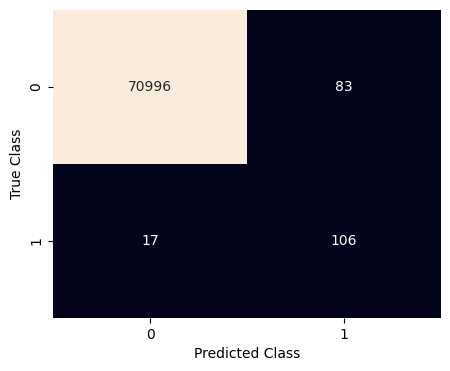

In [64]:
my.plot_confusion_matrix(y_test,y_pred)

### 학습 LightGBM

In [67]:
# !pip install lightgbm

In [68]:
%%time
# 이 셀이 얼마나 걸리는지 시간을 측정해주는 %%time (맨 위에 넣어야함)

from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=300, max_depth=4, 
                    learning_rate=0.1, # 딥러닝할 땐 0.001이런식
                   random_state=2022)
clf.fit(X_train_o, y_train_o) # 지도학습이기 때문에 결과를 같이 넣어준다.

CPU times: total: 21.1 s
Wall time: 3.09 s


LGBMClassifier(max_depth=4, n_estimators=300, random_state=2022)

In [72]:
y_pred = clf.predict(X_test)

In [73]:
my.print_score(y_test, y_pred)

accuracy: 0.9982163422375776
precision: 0.49074074074074076
recall: 0.8617886178861789


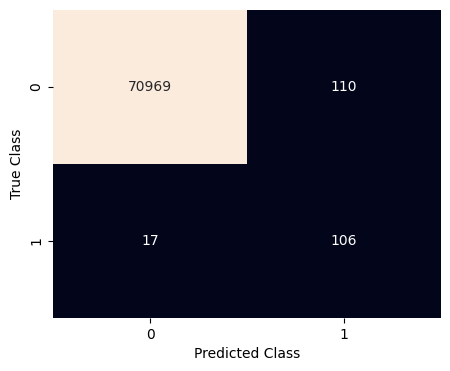

In [74]:
my.plot_confusion_matrix(y_test,y_pred)

### RandomForest

In [76]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, max_depth=4,
                   random_state=2022)
clf.fit(X_train_o, y_train_o) # 지도학습이기 때문에 결과를 같이 넣어준다.

CPU times: total: 4min 6s
Wall time: 4min 22s


RandomForestClassifier(max_depth=4, n_estimators=300, random_state=2022)

In [77]:
y_pred = clf.predict(X_test)

In [78]:
my.print_score(y_test, y_pred)

accuracy: 0.9949860958961827
precision: 0.2422907488986784
recall: 0.8943089430894309


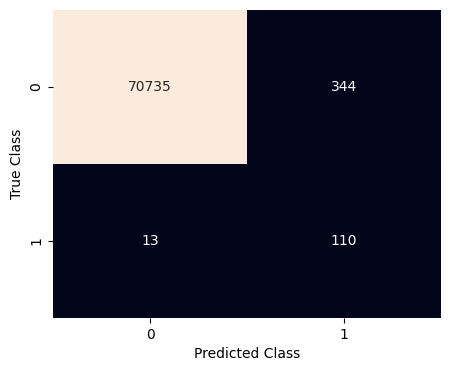

In [79]:
my.plot_confusion_matrix(y_test,y_pred)